In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd


def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [31]:
import numpy as np
df=pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df = df.sort_values(['ID', 'Date'])
df['month-day']=df['Date'].apply(lambda x: x[5:])
df['year']=df['Date'].apply(lambda x: x[:4])

df=df[df['month-day'] !='02-29']
df['Data_Value'].min()

-343

In [32]:
df_15=df[df['year']=='2015']
df_1_15=df_15[df_15['Element']=='TMAX']
df_1_15=df_1_15[['month-day','Data_Value']]
df_1_15_data=df_1_15.sort_values('month-day').groupby('month-day').mean().copy()
df_1_15_data=df_1_15_data.reset_index()
df_1_15_data.head()

,month-day,Data_Value
0,01-01,-32.000000
1,01-02,2.789474
2,01-03,18.055556
3,01-04,16.200000
4,01-05,-12.842105


In [33]:
df_15_min=df_15[df_15['Element']=='TMIN']
df_15_min=df_15_min[['month-day','Data_Value']]
df_15_min_data=df_15_min.sort_values('month-day').groupby('month-day').mean().copy()
df_15_min_data=df_15_min_data.reset_index()
df_15_min_data.head()

,month-day,Data_Value
0,01-01,-98.611111
1,01-02,-69.777778
2,01-03,-48.000000
3,01-04,-27.100000
4,01-05,-136.947368


In [34]:
df_1=df[(df['Element']=='TMAX') & (df['year']!='2015')]
df_1=df_1[['month-day','Data_Value']]
df_1_data=df_1.sort_values('month-day').groupby('month-day').mean().copy()
df_1_data=df_1_data.reset_index()
df_1_data.head()

,month-day,Data_Value
0,01-01,32.324873
1,01-02,11.542857
2,01-03,-8.701422
3,01-04,1.830986
4,01-05,17.685714


In [35]:
df_2=df[(df['Element']=='TMIN') & (df['year']!='2015')]
df_2=df_2[['month-day','Data_Value']]
df_2_data=df_2.sort_values('month-day').groupby('month-day').mean().copy()
df_2_data=df_2_data.reset_index()
df_2_data.head()

,month-day,Data_Value
0,01-01,-47.623116
1,01-02,-77.870813
2,01-03,-95.569378
3,01-04,-72.925743
4,01-05,-56.687805


In [36]:
broken_max=df_1_15_data[(df_1_15_data['Data_Value'])>(df_1_data['Data_Value'])].index.tolist()
broken_min=df_15_min_data[(df_15_min_data['Data_Value'])<(df_2_data['Data_Value'])].index.tolist()


,ID,Date,Element,Data_Value,month-day,year
55067,USC00200032,2005-01-01,TMIN,-28,01-01,2005
55102,USC00200032,2005-01-01,TMAX,67,01-01,2005
112671,USC00200032,2005-01-02,TMAX,122,01-02,2005
112708,USC00200032,2005-01-02,TMIN,-6,01-02,2005
104159,USC00200032,2005-01-03,TMIN,11,01-03,2005
104196,USC00200032,2005-01-03,TMAX,39,01-03,2005
3408,USC00200032,2005-01-04,TMIN,6,01-04,2005
3447,USC00200032,2005-01-04,TMAX,22,01-04,2005
8161,USC00200032,2005-01-05,TMIN,-44,01-05,2005
16564,USC00200032,2005-01-05,TMAX,6,01-05,2005


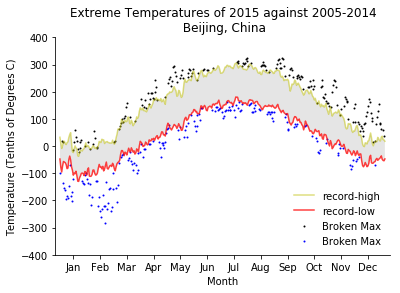

In [40]:
plt.figure()

plt.plot(df_1_data['Data_Value'],'y', alpha=.5, label='record-high' )
plt.plot(df_2_data['Data_Value'],'r', alpha=.75, label='record-low')

plt.scatter(broken_max, df_1_15_data['Data_Value'].iloc[broken_max],s = 1, c = 'k', label = 'Broken Max')
plt.scatter(broken_min, df_15_min_data['Data_Value'].iloc[broken_min],s = 1, c = 'b', label = 'Broken Max')

plt.xlabel('Month')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.title('Extreme Temperatures of 2015 against 2005-2014\n Beijing, China')

plt.gca().fill_between(range(len(df_1_data)), 
                       df_2_data['Data_Value'], df_1_data['Data_Value'], 
                       facecolor='grey', 
                       alpha=0.2)

plt.gca().axis([-5, 370, -400, 400])
plt.legend(frameon = False)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

a = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]
b = [i+15 for i in a]

Month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(b, Month_name)
plt.show()